### The main procedure
1. read the lya_cut.pickle file, get the plate-mjd-fiber list and output it into a file 
2. read the plate-mjd-fiber list file, use IDL read_spec routine to output neighbour spectrum in HDF5 format. [`boss_write_cross_talk_spec.pro`]
3. use python a routine to read that file, output the image 

In [4]:
#step 1
import subprocess
import os
import sys
sys.path.append('../')
import utils as ul
import copy
import pickle
import gzip
from matplotlib import pyplot as plt
import numpy as np
from scipy.signal import medfilt
import pandas as pd
import collections

dir_data = '/data/inspur_disk03/userdir/caoxy/eboss_lya/data/'
lya_hits_cut = pickle.load(gzip.open(dir_data+'lya_hits_cut.pzip'))

plate = lya_hits_cut['plate_hits']
mjd = lya_hits_cut['mjd_hits']
fiber = lya_hits_cut['fiber_hits']
peak_wave = lya_hits_cut['peak_wave']

df = pd.DataFrame({'plate':plate,'mjd':mjd,'fiber':fiber},columns=['plate', 'mjd','fiber'])
df.to_csv('/data/inspur_disk03/userdir/caoxy/eboss_lya/data/lya_hits_cut.csv',header=False,index=False)

In [5]:
lya_hits_cut['peak_wave']

array([3760.10523668, 3754.9140461 , 4459.64203179, ..., 4279.5686753 ,
       4320.16167618, 3967.34528932])

In [6]:
fiber

array([381, 937, 211, ..., 155, 155, 286])

In [7]:
plate

array([10243, 10272, 10274, ...,  9631,  9631,  9632])

In [72]:
mjd

array([58159, 58172, 58170, ..., 58086, 58086, 58130])

In [73]:
'{}_{}.h5'.format(10243,58130)

'10243_58130.h5'

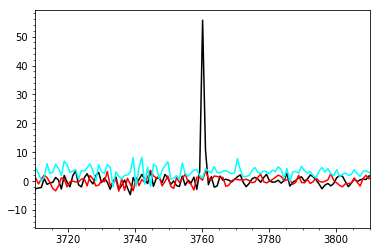

In [8]:
#step 2
import h5py
from matplotlib import pyplot as plt
data_dir = '/data/inspur_disk03/userdir/caoxy/eboss_lya/data/cross_talk/'

color = ['black','red','cyan']
for ii in range(1):
    fig,ax = plt.subplots()
    for jj in range(3):
        h5_file = data_dir + '{}_{}_{}_{}.h5'.format(plate[ii],mjd[ii],fiber[ii],jj)
        with h5py.File(h5_file, 'r') as f:
            arr0 = f['flux']
            flux = arr0[:]
            
            arr1 = f['wave']
            wave = arr1[:]
            
            arr2 = f['zans']
            zans = arr2[:]
        ax.plot(wave,flux,color=color[jj])
        ax.set_xlim(peak_wave[0]-50,peak_wave[0]+50)
        ax.minorticks_on()
        #fig.savefig('xxxx.png')

(3710.10523668496, 3810.10523668496)

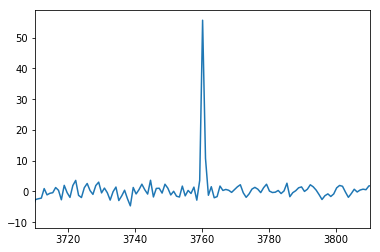

In [86]:
plt.plot(wave,flux)
plt.xlim(peak_wave[0]-50,peak_wave[0]+50)

In [76]:
zans.shape

(209,)

In [67]:
plate

array([10243, 10272, 10274, ...,  9631,  9631,  9632])

In [55]:
fiber

array([381, 937, 211, ..., 155, 155, 286])

In [58]:
mjd

array([58159, 58172, 58170, ..., 58086, 58086, 58130])